In [1]:
import numpy as np 
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
%matplotlib inline

In [2]:
df = pd.read_csv('Full Dataset (league standings with players stats).csv')
lgStand = pd.read_csv('League Standings.csv')

In [3]:
lgStand.rename(columns = {'Team':'teamname','Season':'season'}, inplace = True)
lgStand.head(5)

,Unnamed: 0,season,Standings,teamname,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
0,0,10/11,1,ManchesterUnited,38,23,11,4,78,37,41,80
1,1,10/11,2,Chelsea,38,21,8,9,69,33,36,71
2,2,10/11,3,ManchesterCity,38,21,8,9,60,33,27,71
3,3,10/11,4,Arsenal,38,19,11,8,72,43,29,68
4,4,10/11,5,TottenhamHotspur,38,16,14,8,55,46,9,62


In [4]:
df = df.drop(df.filter(like = 'Unn'), axis = 1)

In [5]:
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [6]:
#Keep only data for players who have played in the season
df = df[df['minutes']!=0]
df.head(5)

,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
1,19153,Gareth,Barry,39.0,England,183 cm,78 kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,19203,Ashley,Cole,41.0,England,176 cm,66 kg,False,42,Arsenal,2.0,2.0,180.0,Defender,NaN,False,0.0,0.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,50978,Justin,Hoyte,36.0,Trinidad and Tobago,180 cm,68 kg,False,42,Arsenal,1.0,0.0,1.0,Defender,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,77110,Thomas,Løvendahl Sørensen,45.0,Denmark,196 cm,89 kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,NaN,False,0.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,83026,Peter,Whittingham,34.0,England,178 cm,63 kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,NaN,False,1.0,0.0,1.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,02/03,Thierry Henry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
sumOfMetrics = df.groupby(df['season']).sum().reset_index()
avOfPassAcc = df.groupby(df['season']).mean().reset_index()

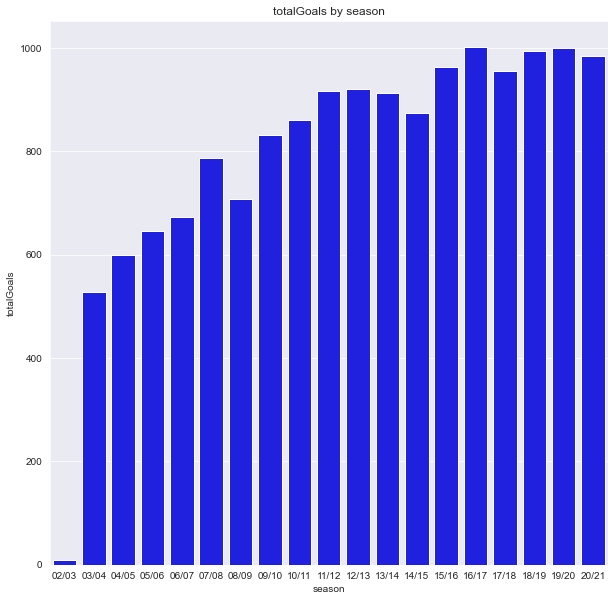

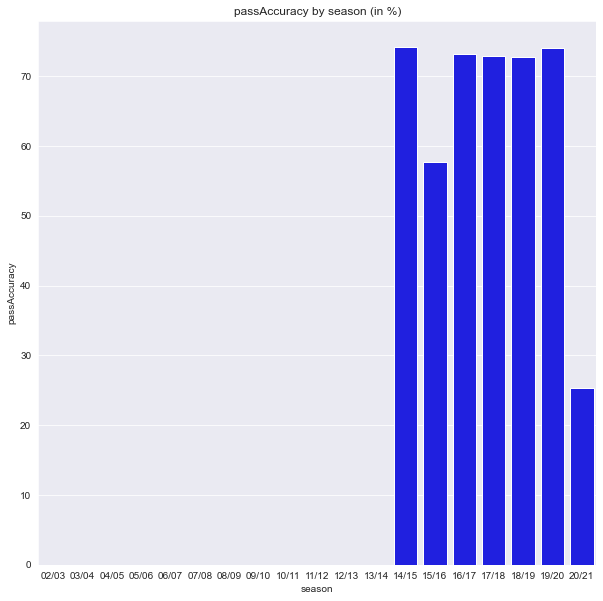

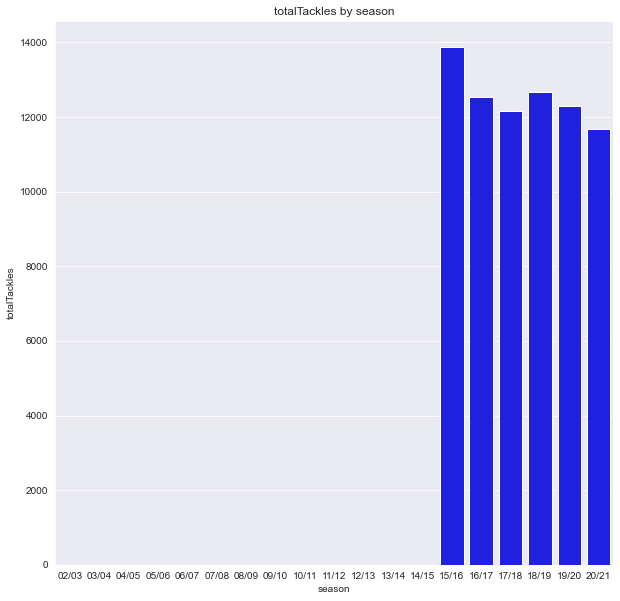

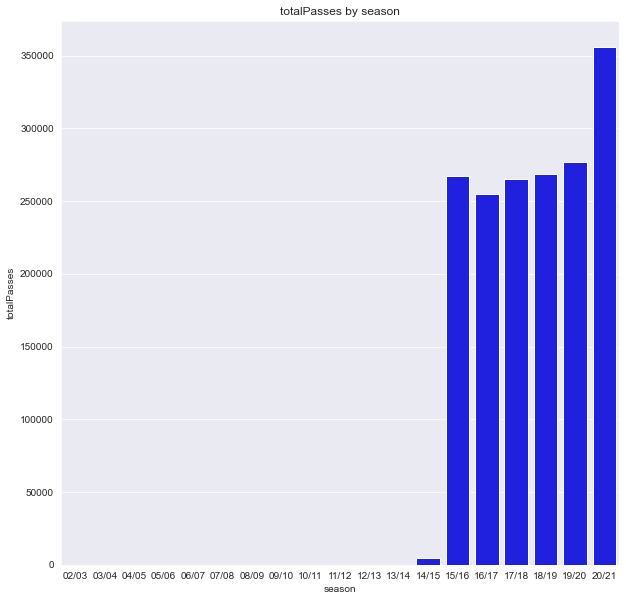

In [8]:
#General statistics throughout seasons
cols = ['totalGoals','passAccuracy','totalTackles','totalPasses']
sns.set_style('darkgrid')
sns.set_palette('Set2')
#ns.set_context("paper", rc={"axes.labelsize":25})
for col in cols: 
    if col == 'passAccuracy': 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=avOfPassAcc, \
                    x=avOfPassAcc['season'],\
                    y=avOfPassAcc[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season (in %)')
    else: 
        fig, ax = plt.subplots(figsize=(10, 10))    
        sns.barplot(data=sumOfMetrics, \
                    x=sumOfMetrics['season'],\
                    y=sumOfMetrics[col],\
                    color = 'blue',\
                    ax = ax).set_title(str(col) + ' by season')

In [9]:
#Plot relationship between league position and number of goals
#Have to group by season and team
totalGoalSznTeam = df.groupby(['teamname','season']).sum().reset_index()
totalGoalSznTeam = totalGoalSznTeam.filter(['teamname', 'season'])

In [10]:
merged = totalGoalSznTeam.merge(lgStand, how = 'left', on = ['season','teamname'])
merged.head(5)

,teamname,season,Unnamed: 0,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points
0,Arsenal,02/03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arsenal,03/04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arsenal,04/05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arsenal,05/06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arsenal,06/07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
to_merge = df.groupby(['season','teamname']).sum().reset_index()

In [12]:
forLinearReg = merged.merge(to_merge,how = 'left', on = ['season','teamname'])

In [13]:
forLinearReg = forLinearReg.drop(forLinearReg.filter(like = 'Unn'), axis = 1)

In [14]:
forLinearReg.dropna(inplace=True)

In [15]:
#Remove the data that is 0. We don't need data from 13/14 until the most recent data.
forLinearReg['to_remove'] = forLinearReg['season'].str[:2]
forLinearReg['to_remove'] = forLinearReg['to_remove'].astype(int)
forLinearRegMod = forLinearReg[forLinearReg['to_remove'] > 14]

In [16]:
to_generate = forLinearRegMod.columns
to_generate = to_generate[24:50]

In [17]:
#let's get some metrics aswell
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))
C:\Users\Kamen\anaconda3\lib\site-packag

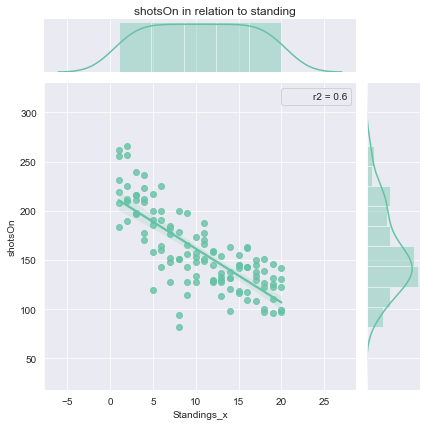

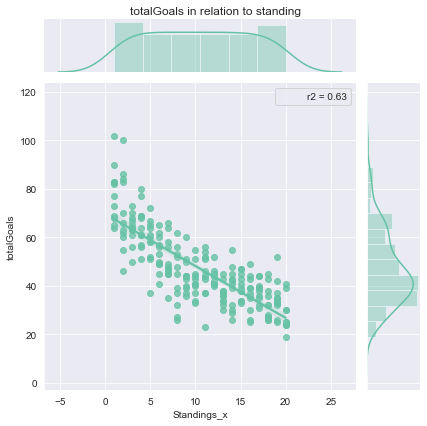

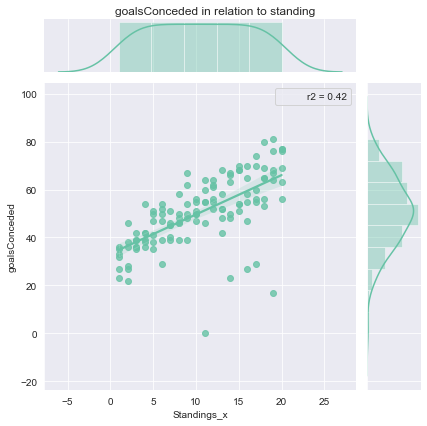

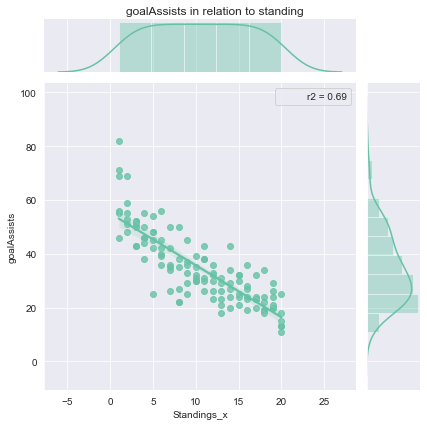

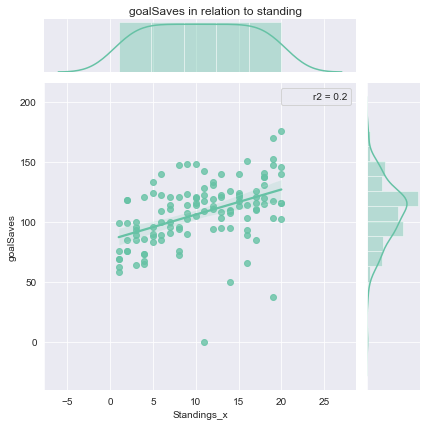

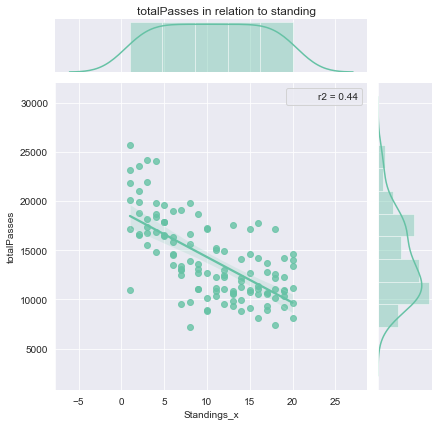

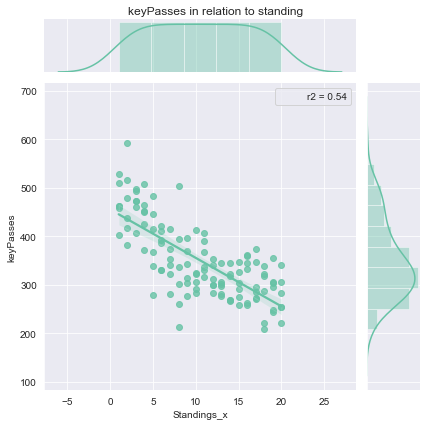

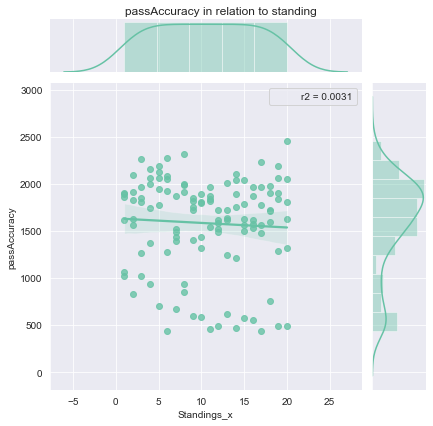

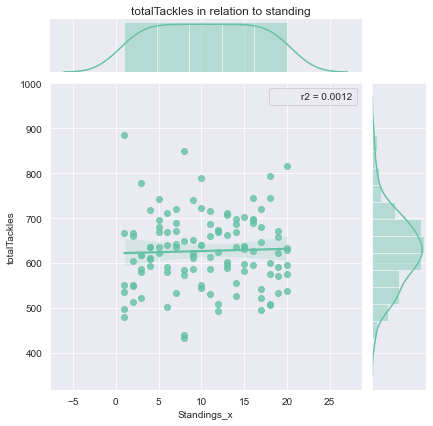

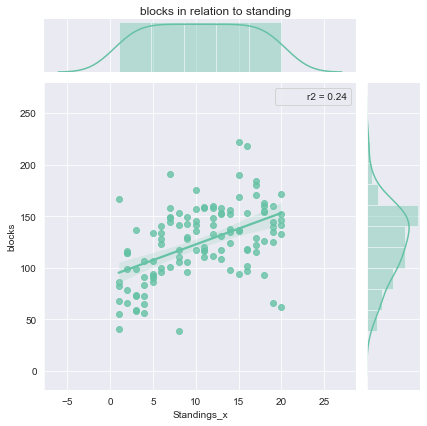

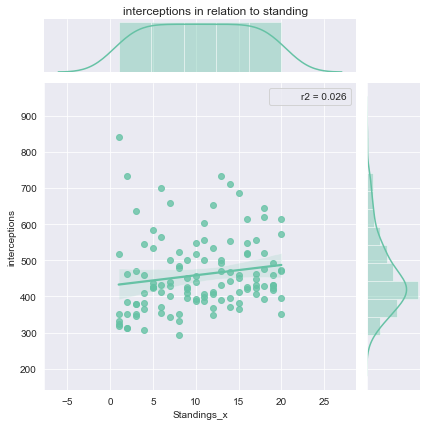

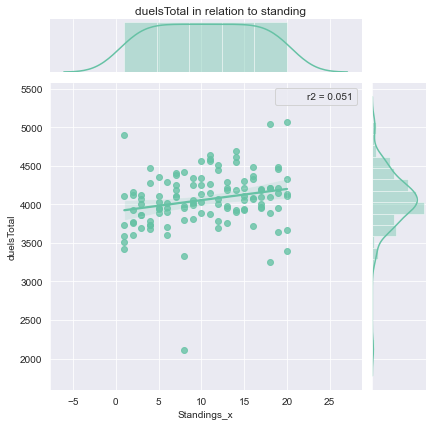

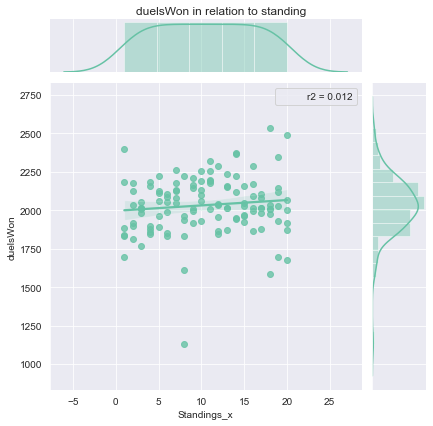

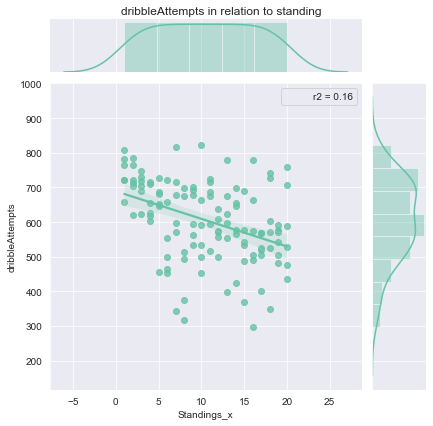

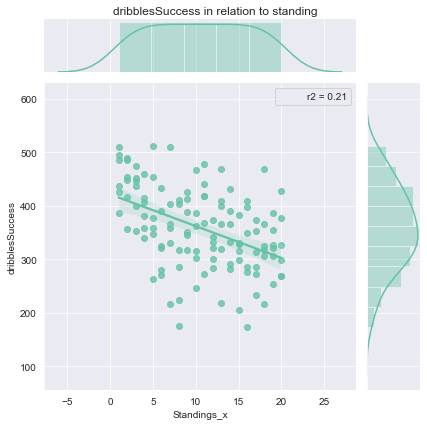

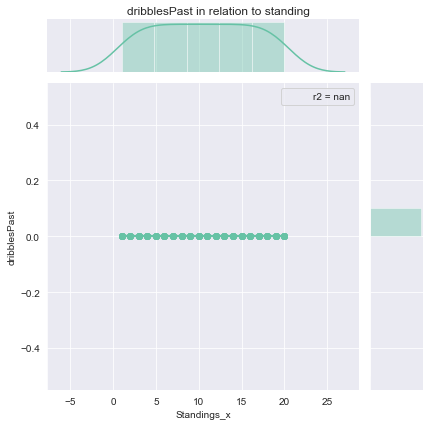

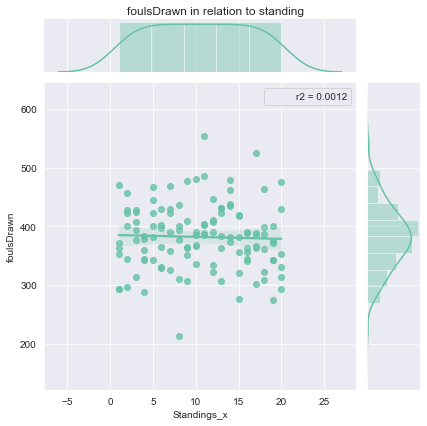

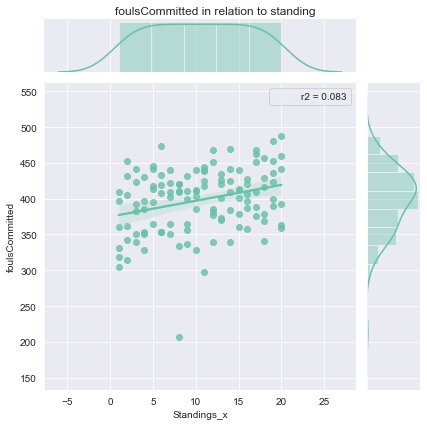

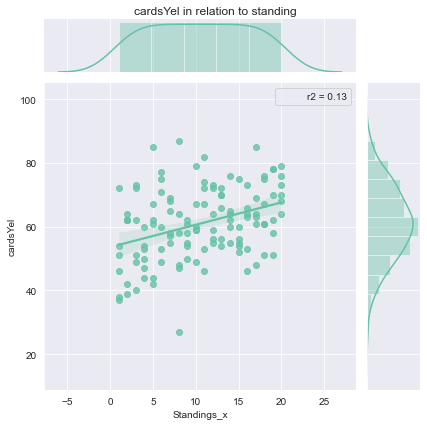

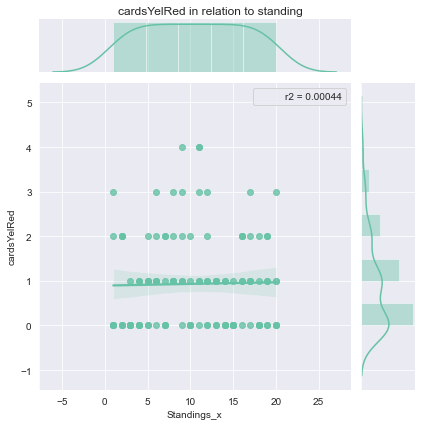

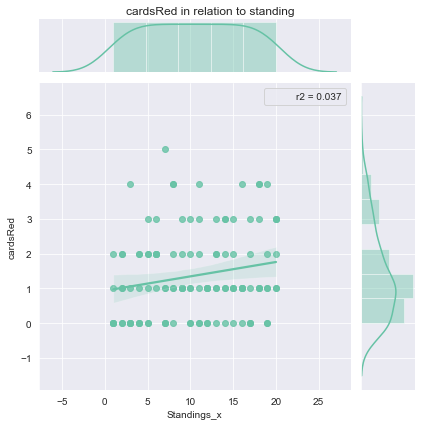

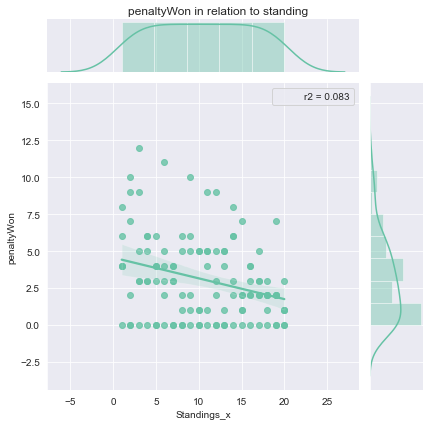

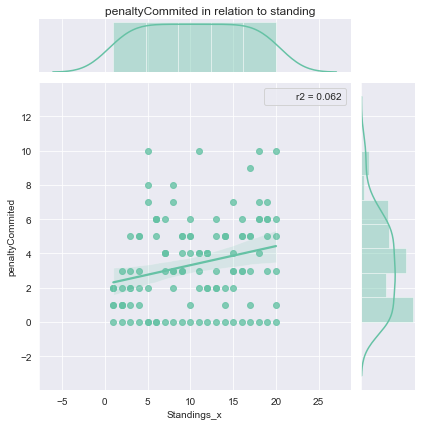

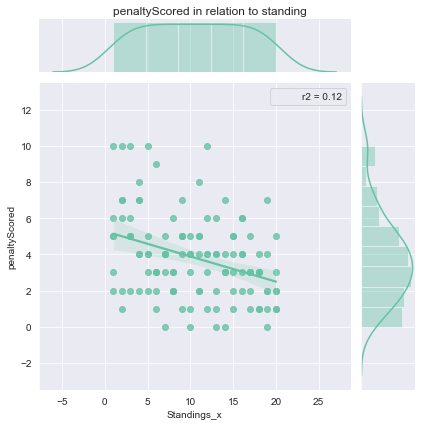

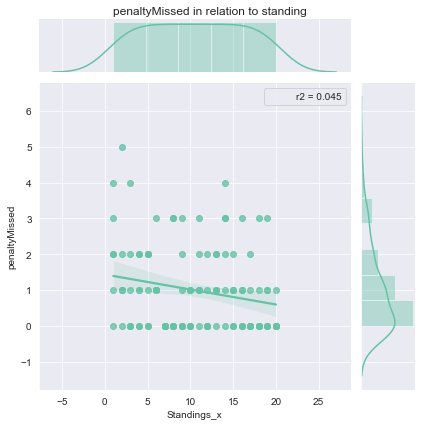

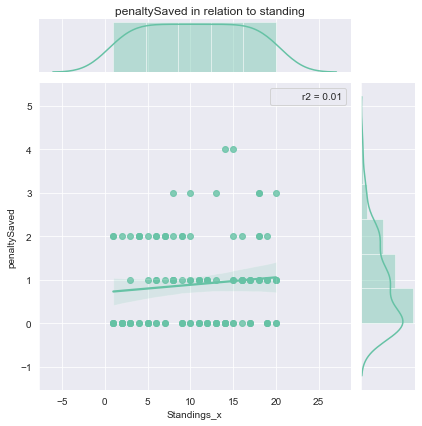

In [18]:
#Plot lin reg 
for col in to_generate:
    if col == 'totalGoals': 
        sns.jointplot(data=forLinearReg, x='Standings_x', y='totalGoals',kind="reg",stat_func=r2)
        plt.suptitle('totalGoals in relation to standing')
        plt.subplots_adjust(top=0.95)
    else: 
        sns.jointplot(data=forLinearRegMod, x='Standings_x', y=col,kind="reg",stat_func=r2)
        plt.suptitle(str(col)+ ' in relation to standing')
        plt.subplots_adjust(top=0.95)

#Intuitively enough, there seems to be a linear relationship with the final position with, the number of goals scored,
#the number of assists, key passes, total passes, shots on target. These attributes have the strongest relationship
#with the position. I expected a better relationship with duelsWon, interceptions, passAccuracy. 

#The r2 scores are not too strong but can still demonstrate some relationship between the variables

In [19]:
df.reset_index(inplace=True)

In [20]:
df['firstname_new'] = df['firstname'].str.split().str[0]

In [21]:
df['fullname_new'] = df['firstname_new'] + ' ' + df['lastname']

In [22]:
#Create a goal contribution column to see the % contributed to team goals
df.fillna(0, inplace=True)
df['Goal contribution'] = (df['totalGoals']+df['goalAssists'])/df['GoalsFor']

In [23]:
df['name'] = df['name'].str.replace(r'\([^)]*\)','', regex=True)
df = df.replace(r'[,\"\']','', regex=True).replace(r'\s*([^\s]+)\s*', r'\1', regex=True)

In [24]:
df.head(5)

,index,id,firstname,lastname,age,nationality,height,weight,injured,teamID,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalsConceded,goalAssists,goalSaves,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,name,Standings,Played,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,firstname_new,fullname_new,Goal contribution
0,1,19153,Gareth,Barry,39.0,England,183cm,78kg,False,66,AstonVilla,1.0,1.0,90.0,Midfielder,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Gareth,GarethBarry,NaN
1,2,19203,Ashley,Cole,41.0,England,176cm,66kg,False,42,Arsenal,2.0,2.0,180.0,Defender,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Ashley,AshleyCole,NaN
2,4,50978,Justin,Hoyte,36.0,TrinidadandTobago,180cm,68kg,False,42,Arsenal,1.0,0.0,1.0,Defender,0.0,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Justin,JustinHoyte,NaN
3,5,77110,Thomas,LøvendahlSørensen,45.0,Denmark,196cm,89kg,False,746,Sunderland,1.0,1.0,90.0,Goalkeeper,0.0,False,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Thomas,ThomasLøvendahlSørensen,NaN
4,6,83026,Peter,Whittingham,34.0,England,178cm,63kg,False,66,AstonVilla,2.0,1.0,123.0,Midfielder,0.0,False,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,02/03,ThierryHenry,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Peter,PeterWhittingham,NaN


In [25]:
df['PFA discrim'] = [x[0] in x[1] for x in zip(df['name'], df['fullname_new'])]

In [26]:
PFAdf = df[df['PFA discrim'] == True]

In [27]:
PFAdf = PFAdf.drop(['index','id','firstname','lastname','height','weight','injured','teamID','goalsConceded','goalSaves','name','firstname_new','Played'],axis=1)

In [28]:
PFAdf.head(5)

,age,nationality,teamname,appearences,lineups,minutes,position,rating,captain,subIn,subOut,bench,totalShots,shotsOn,totalGoals,goalAssists,totalPasses,keyPasses,passAccuracy,totalTackles,blocks,interceptions,duelsTotal,duelsWon,dribbleAttempts,dribblesSuccess,dribblesPast,foulsDrawn,foulsCommitted,cardsYel,cardsYelRed,cardsRed,penaltyWon,penaltyCommited,penaltyScored,penaltyMissed,penaltySaved,season,Standings,Wins,Draw,Lost,GoalsFor,GoalsAgainst,GoalDifference,Points,fullname_new,Goal contribution,PFA discrim
89,37.0,France,Arsenal,37.0,37.0,3330.0,Attacker,0.0,False,0.0,0.0,0.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,03/04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,ThierryHenry,inf,True
348,41.0,England,Chelsea,36.0,36.0,3240.0,Defender,0.0,False,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,04/05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,JohnTerry,inf,True
2004,41.0,Wales,ManchesterUnited,28.0,15.0,1499.0,Midfielder,0.0,False,13.0,3.0,17.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,08/09,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,RyanGiggs,inf,True
3105,33.0,Wales,TottenhamHotspur,30.0,29.0,2452.0,Attacker,0.0,False,1.0,4.0,1.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10/11,5.0,16.0,14.0,8.0,55.0,46.0,9.0,62.0,GarethBale,0.127273,True
3195,36.0,Netherlands,Arsenal,38.0,37.0,3334.0,Attacker,0.0,False,1.0,3.0,1.0,0.0,0.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11/12,3.0,21.0,7.0,10.0,74.0,49.0,25.0,70.0,RobinvanPersie,0.405405,True


In [29]:
#Analysis idea: based on position, see how the player ranks compared to other players in the same position

In [30]:
#Creating bell curves of given attributes to see how the players compares to other players

In [31]:
PFAdf.index

Int64Index([89, 348, 2004, 3105, 3195, 4111, 4601, 5147, 5592, 6147, 6533,
            7009, 7402, 7909],
           dtype='int64')

In [32]:
# A custom function to calculate
# probability distribution function
def pdf(x):
    mean = np.mean(x)
    #print('Mean: ',mean)
    std = np.std(x)
    #print('Standard Deviation: ',std)
    y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
    return y_out

#Custom function to create a bell curve
def bell_curve(mark, x, y): 
    plt.style.use('seaborn')
    plt.figure(figsize = (6, 6))
    plt.plot(x, y, color = 'black',\
             linestyle = 'dashed')
    plt.plot(mark,0, marker="X", label="points",color = 'blue')
    plt.scatter( x, y, marker = 'o', s = 25, color = 'red')
    plt.title(str(col)+ ' bell cruve')
    plt.show()



In [33]:
#The bell curve is not very standerdized. To compare how our players of the year did in comparison to the group,
#we should create the same visuals but for a specific position.

In [34]:
dfAttacker = df[df['position']=='Attacker']
dfMidfielder = df[df['position']=='Midfielder']
dfDefender = df[df['position']=='Defender']

In [35]:
n = 0
full_tab = []
for index, row in PFAdf.iterrows():
    if int(row['season'][:2]) >= 14: 
        #print(row['fullname_new'])
        tab = []
        tab.append(row['fullname_new'])
        tab.append(row['season'])
        if row['position'] == 'Attacker': 
            for col in to_generate:
                tab.append(col)
                #To place data of a given player
                mark = df.iloc[index][col]
                tab.append(mark)
                # To generate an array of x-values
                x = dfAttacker[dfAttacker['season']==row['season']][col].sort_values(ascending = True)

                # To generate an array of
                # y-values using corresponding x-values
                y = pdf(x)
                
                tab.append(np.mean(x))
                tab.append(np.std(x))
                #z-score calculation
                z = (mark - np.mean(x))/np.std(x)
                #print('Z-score: ',z)
                tab.append(z)
                # Plotting the bell-shaped curve
                #bell_curve(mark, x, y)
                
                #Add created array in the full array
            full_tab.append(tab)
                
        elif row['position'] == 'Midfielder': 
            for col in to_generate:
                tab.append(col)
                #To place data of a given player
                mark = df.iloc[index][col]
                tab.append(mark)
                
                # To generate an array of x-values
                x = dfMidfielder[dfMidfielder['season']==row['season']][col].sort_values(ascending = True)

                # To generate an array of
                # y-values using corresponding x-values
                y = pdf(x)
                
                tab.append(np.mean(x))
                tab.append(np.std(x))
                #z-score calculation
                z = (mark - np.mean(x))/np.std(x)
                #print('Z-score: ',z)
                
                tab.append(z)
                # Plotting the bell-shaped curve
                #bell_curve(mark, x, y)
                
                #Add created array in the full array
            full_tab.append(tab)
            
        elif row['position'] == 'Defender': 
            for col in to_generate:
                tab.append(col)
                #To place data of a given player
                mark = df.iloc[index][col]
                tab.append(mark)
                
                # To generate an array of x-values
                x = dfDefender[dfDefender['season']==row['season']][col].sort_values(ascending = True)

                # To generate an array of
                # y-values using corresponding x-values
                y = pdf(x)
                
                tab.append(np.mean(x))
                tab.append(np.std(x))
                #z-score calculation
                z = (mark - np.mean(x))/np.std(x)
                #print('Z-score: ',z)
                
                tab.append(z)
                # Plotting the bell-shaped curve
                #bell_curve(mark, x, y)
                
                #Add created array in the full array
            full_tab.append(tab)
    n += 1

<ipython-input-32-a4b2ca97a48a>:8: RuntimeWarning: divide by zero encountered in double_scalars
  y_out = 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))
<ipython-input-35-ac24b0124de5>:25: RuntimeWarning: invalid value encountered in double_scalars
  z = (mark - np.mean(x))/np.std(x)
<ipython-input-35-ac24b0124de5>:51: RuntimeWarning: invalid value encountered in double_scalars
  z = (mark - np.mean(x))/np.std(x)
<ipython-input-35-ac24b0124de5>:78: RuntimeWarning: invalid value encountered in double_scalars
  z = (mark - np.mean(x))/np.std(x)


In [36]:
#Create result matrix
res = []
for i in range(len(full_tab)): 
    playerSzn = full_tab[i][:2]
    to_modify = full_tab[i][2:]
    category = to_modify[::5]
    score_brut = to_modify[1::5]
    mean = to_modify[2::5]
    std = to_modify[3::5]
    z = to_modify[4::5]
    zipped = list(zip(category,score_brut,mean,std,z))
    resultMatrix = pd.DataFrame(zipped, columns = ['Category','Brut Score','Mean','Standard deviation','Z-score'])
    index = resultMatrix.index
    index.name = ' '.join(playerSzn)
    res.append(resultMatrix)

In [59]:
res[0]['Brut Score'].loc[res[0].index[0]] #['Category']

0.0

In [60]:
len(to_generate)

26

In [ ]:
res['Category']

EdenHazard


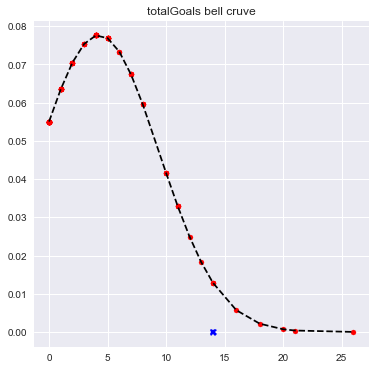

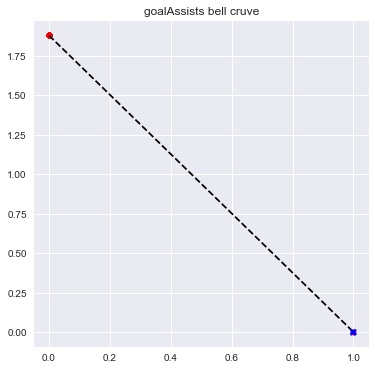

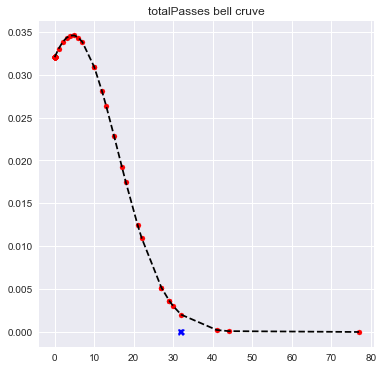

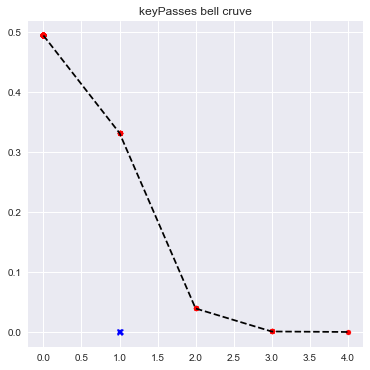

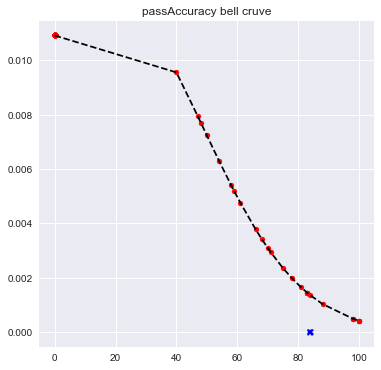

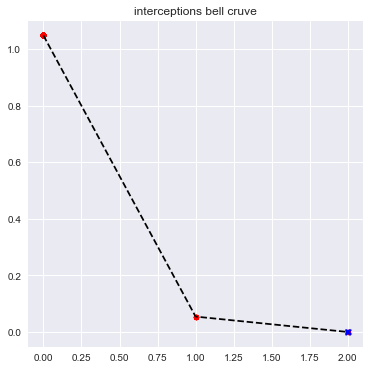

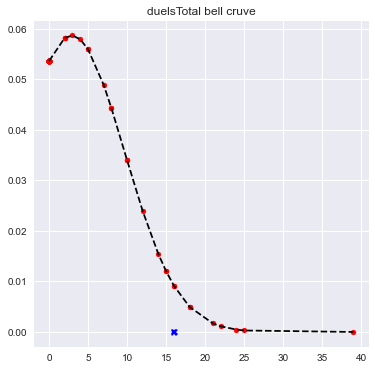

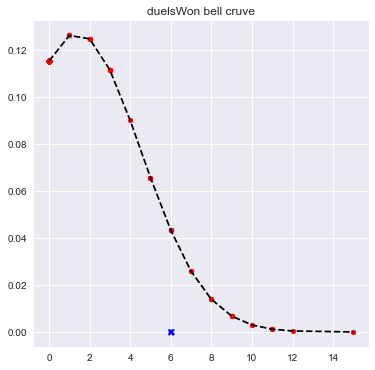

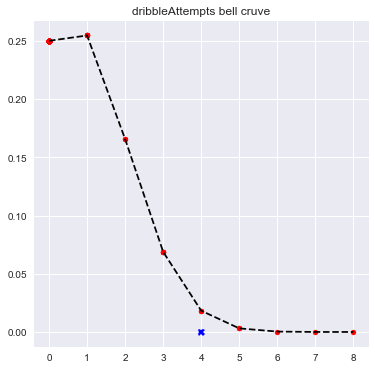

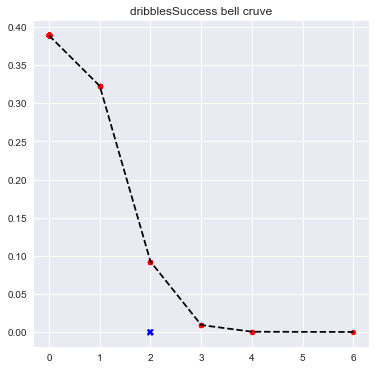

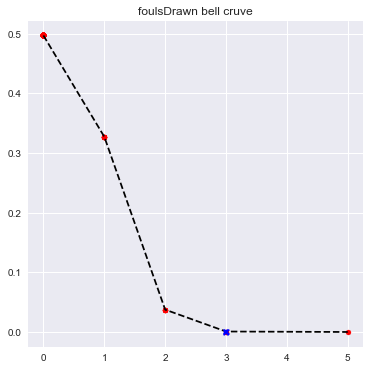

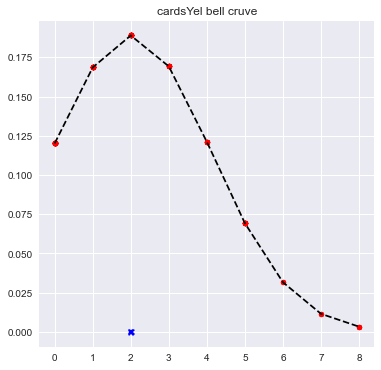

                         Category  Brut Score       Mean  Standard deviation  \
EdenHazard 14/15                                                               
0                         shotsOn         0.0   0.180180            0.618021   
1                      totalGoals        14.0   4.261261            5.135483   
2                   goalsConceded         0.0   0.000000            0.000000   
3                     goalAssists         1.0   0.045045            0.207403   
4                       goalSaves         0.0   0.000000            0.000000   
5                     totalPasses        32.0   4.522523           11.529708   
6                       keyPasses         1.0   0.270270            0.758685   
7                    passAccuracy        84.0  16.603604           31.957257   
8                    totalTackles         0.0   0.000000            0.000000   
9                          blocks         0.0   0.000000            0.000000   
10                  interceptions       

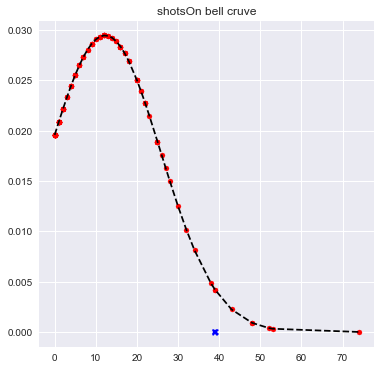

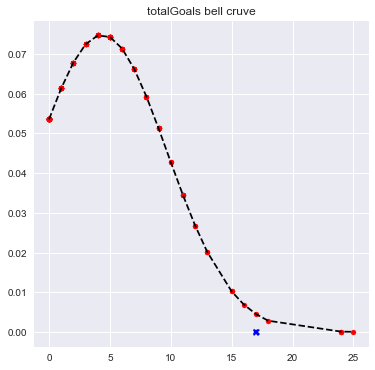

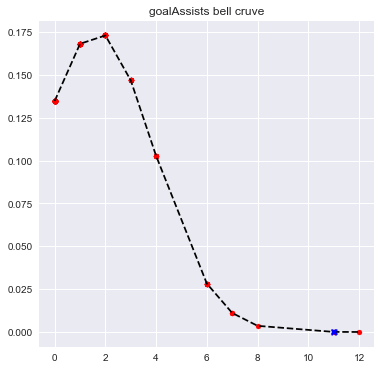

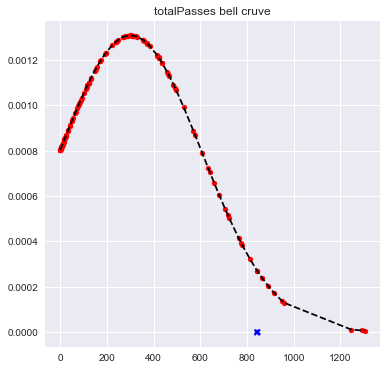

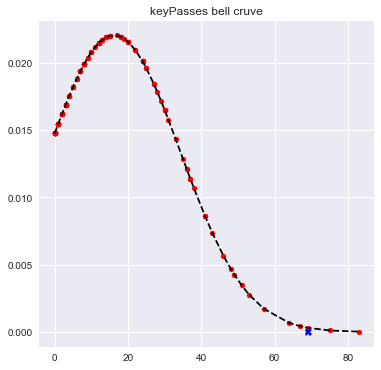

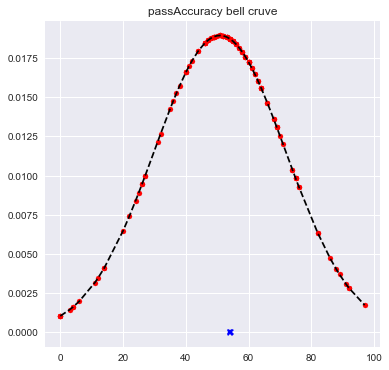

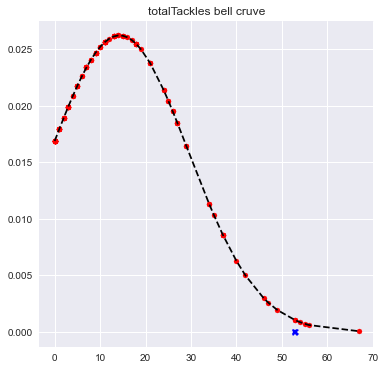

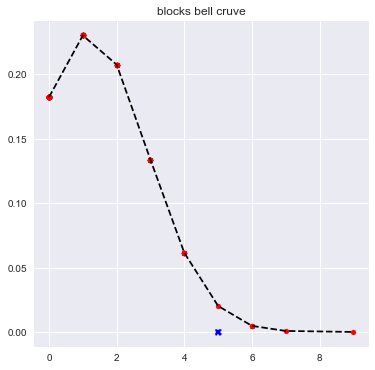

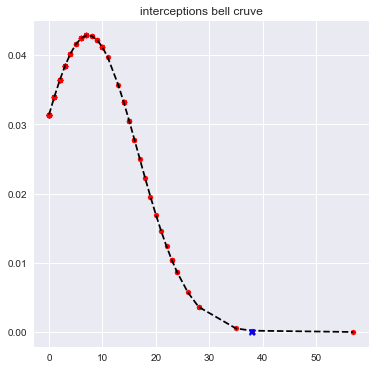

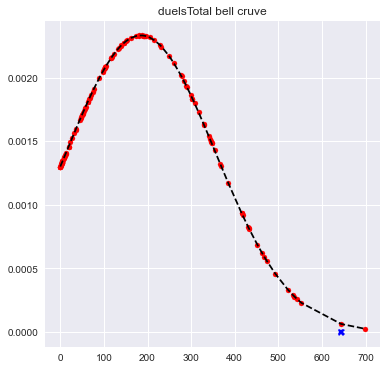

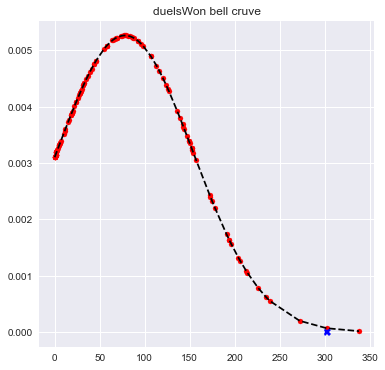

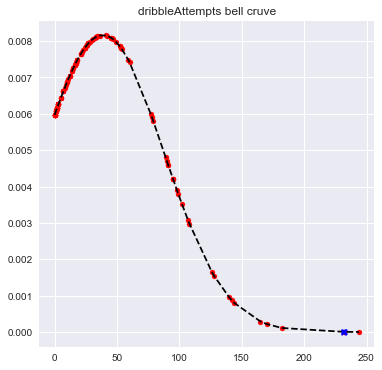

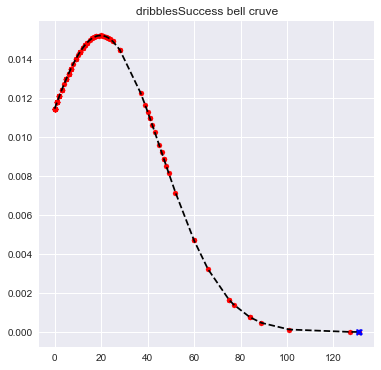

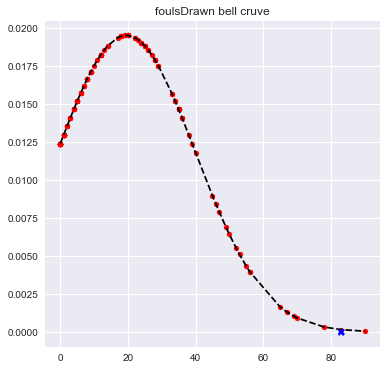

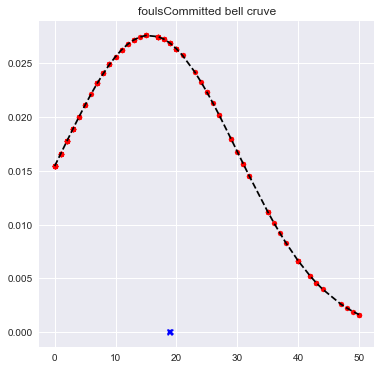

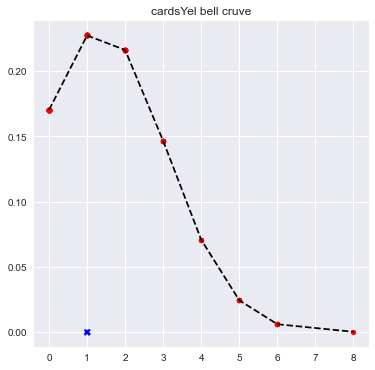

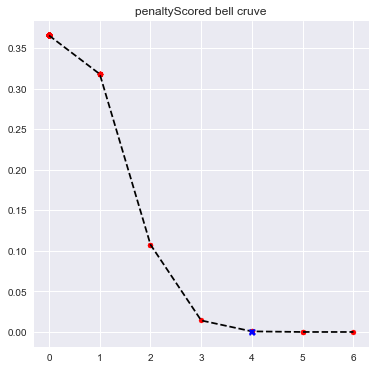

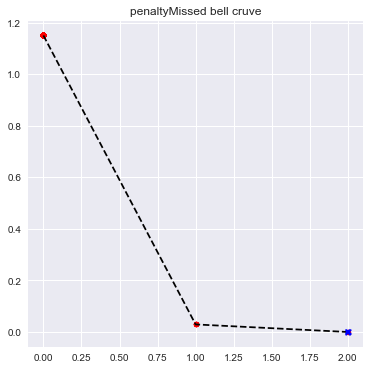

                          Category  Brut Score     Mean  Standard deviation  \
RiyadMahrez 15/16                                                             
0                          shotsOn        39.0   12.248           13.547933   
1                       totalGoals        17.0    4.360            5.331266   
2                    goalsConceded         0.0    0.000            0.000000   
3                      goalAssists        11.0    1.648            2.277739   
4                        goalSaves         0.0    0.000            0.000000   
5                      totalPasses       843.0  301.432          305.196391   
6                        keyPasses        69.0   16.208           18.081281   
7                     passAccuracy        54.0   50.872           21.048126   
8                     totalTackles        53.0   14.280           15.222405   
9                           blocks         5.0    1.192            1.723698   
10                   interceptions        38.0    7.

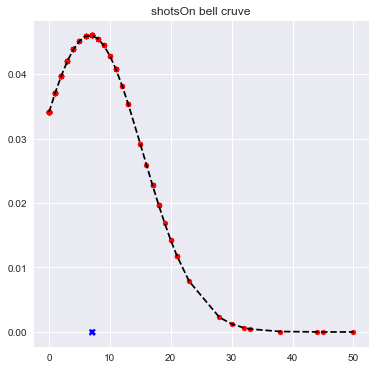

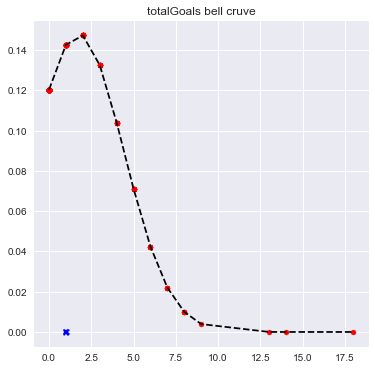

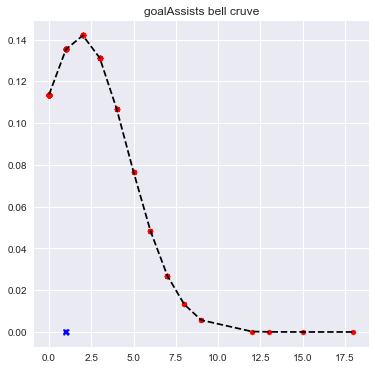

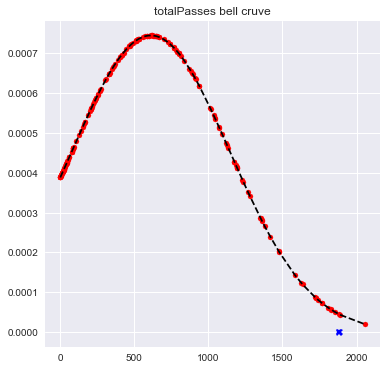

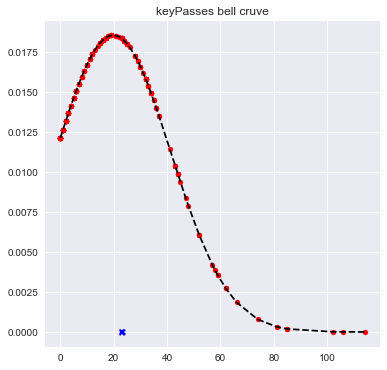

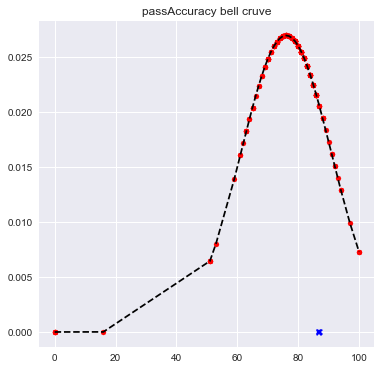

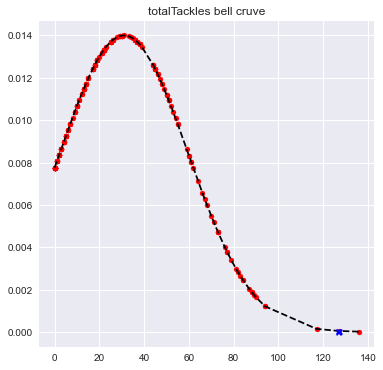

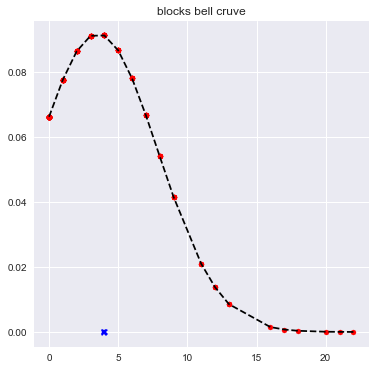

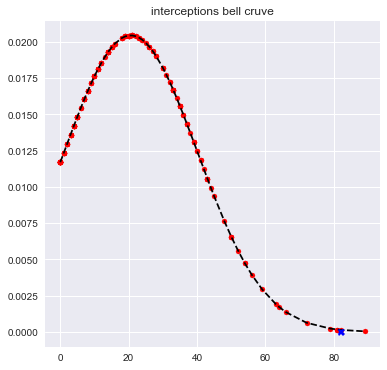

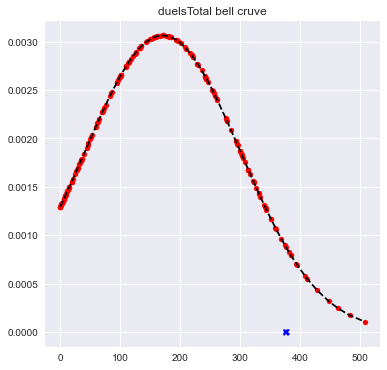

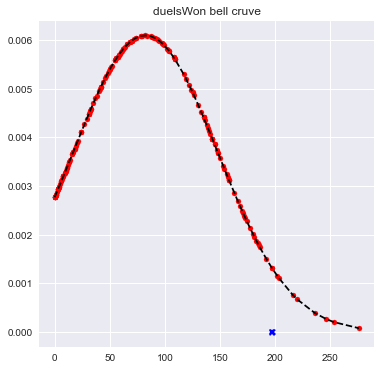

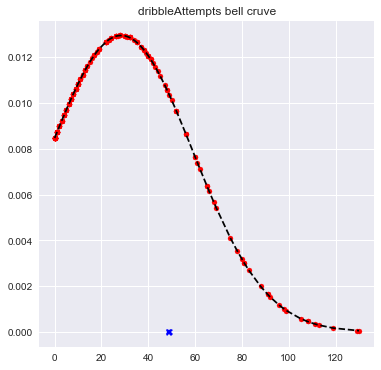

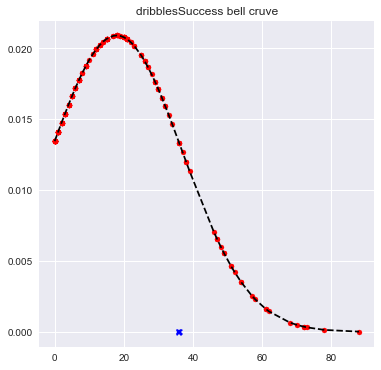

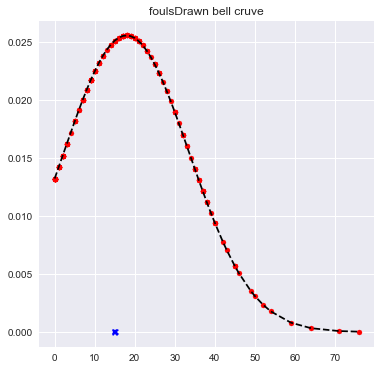

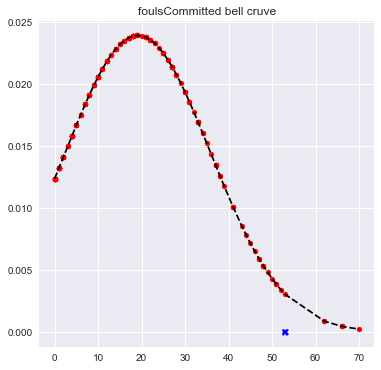

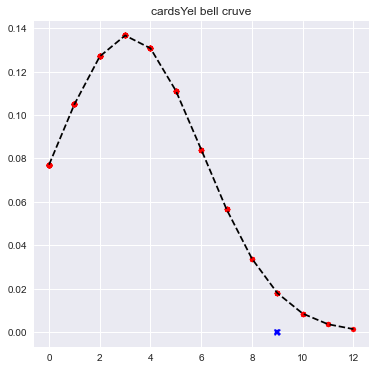

                         Category  Brut Score        Mean  Standard deviation  \
NGoloKanté 16/17                                                                
0                         shotsOn         7.0    6.711230            8.671179   
1                      totalGoals         1.0    1.732620            2.697425   
2                   goalsConceded         0.0    0.000000            0.000000   
3                     goalAssists         1.0    1.877005            2.807716   
4                       goalSaves         0.0    0.000000            0.000000   
5                     totalPasses      1884.0  611.304813          535.415225   
6                       keyPasses        23.0   19.834225           21.522760   
7                    passAccuracy        87.0   76.048128           14.807963   
8                    totalTackles       127.0   30.946524           28.499129   
9                          blocks         4.0    3.518717            4.353795   
10                  intercep

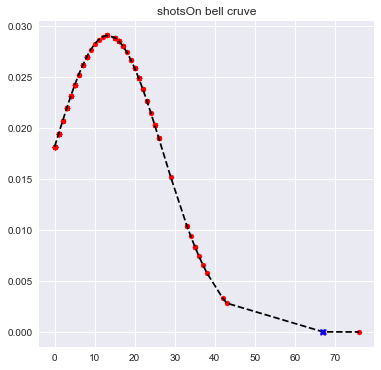

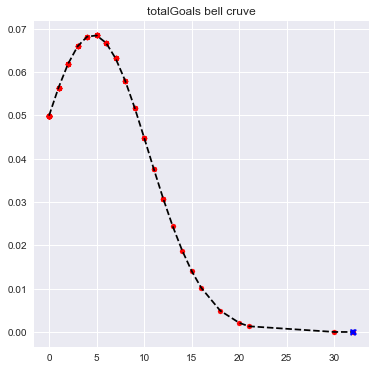

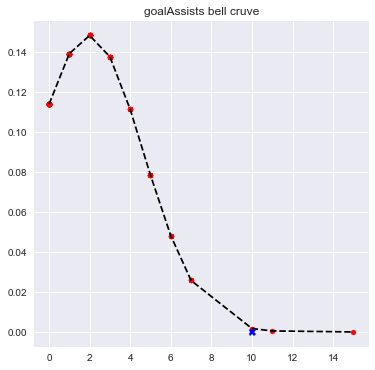

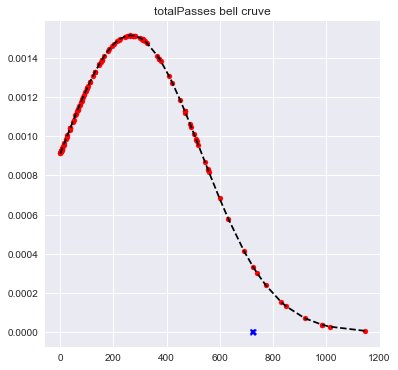

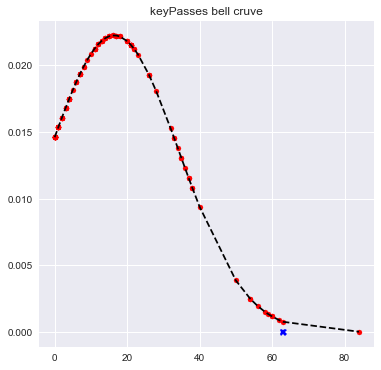

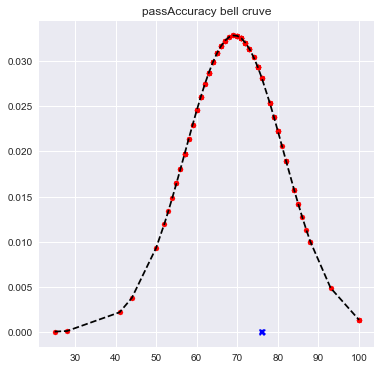

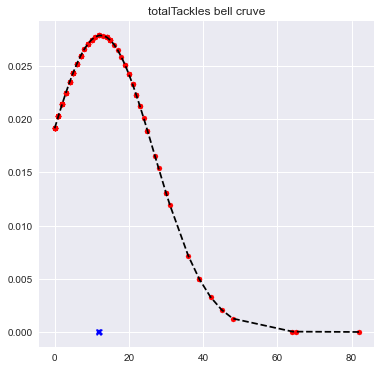

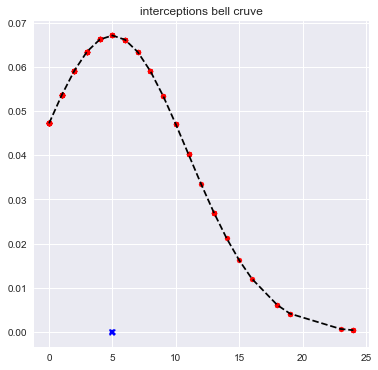

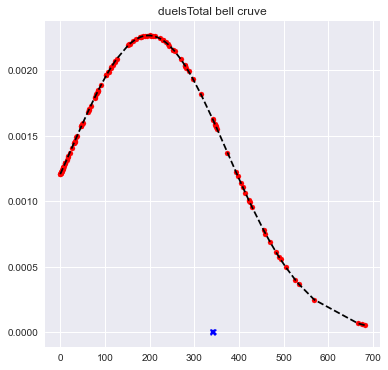

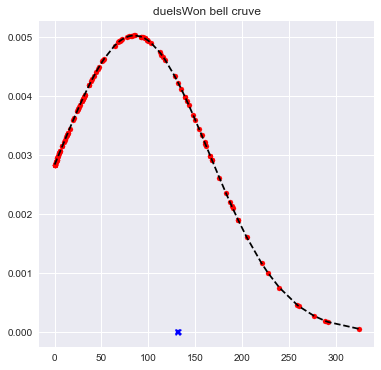

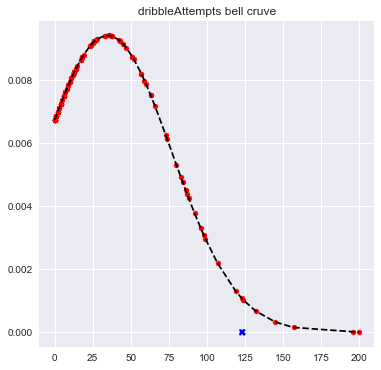

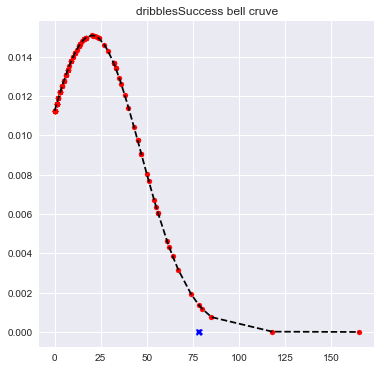

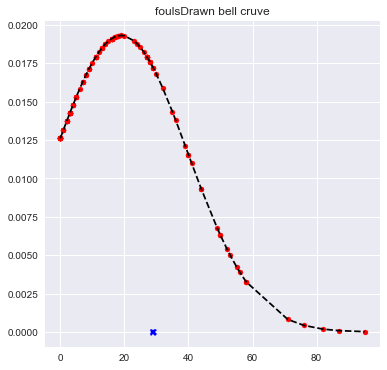

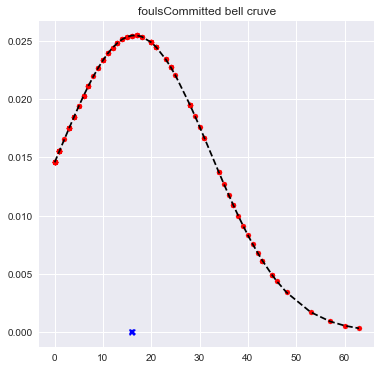

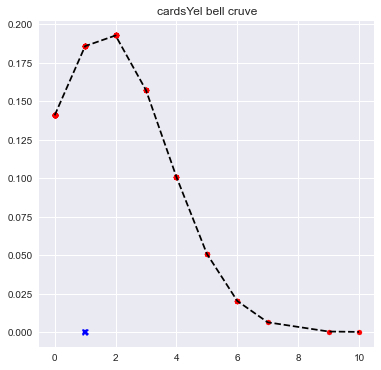

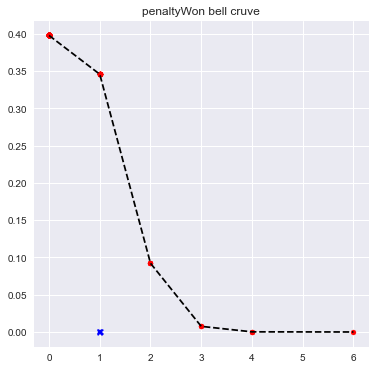

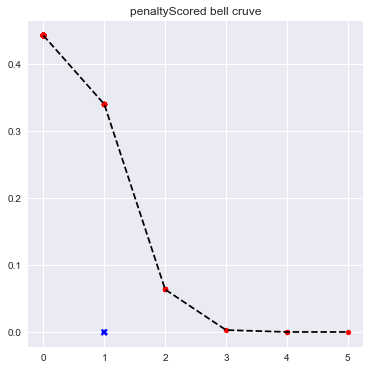

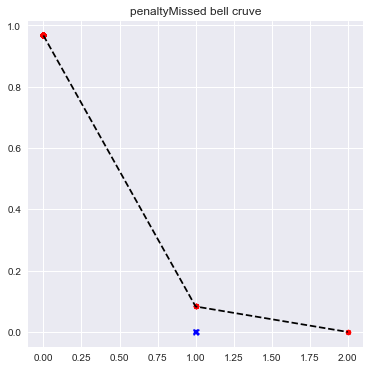

                                Category  Brut Score        Mean  \
MohamedSalahGhaly 17/18                                            
0                                shotsOn        67.0   13.322034   
1                             totalGoals        32.0    4.635593   
2                          goalsConceded         0.0    0.000000   
3                            goalAssists        10.0    1.957627   
4                              goalSaves         0.0    0.000000   
5                            totalPasses       726.0  266.415254   
6                              keyPasses        63.0   16.449153   
7                           passAccuracy        76.0   69.279661   
8                           totalTackles        12.0   12.406780   
9                                 blocks         0.0    1.016949   
10                         interceptions         5.0    4.983051   
11                            duelsTotal       342.0  197.627119   
12                              duelsWon       1

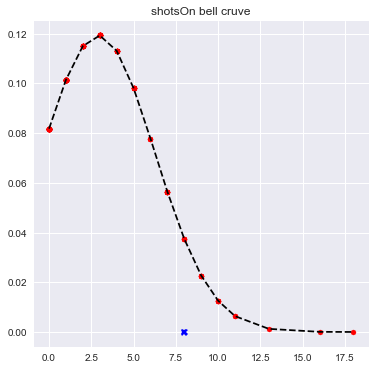

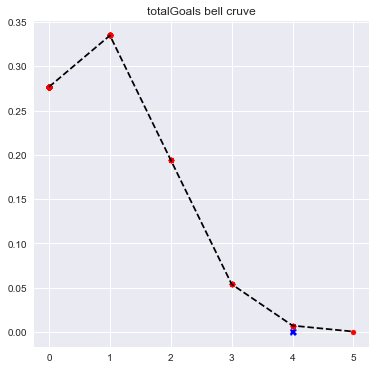

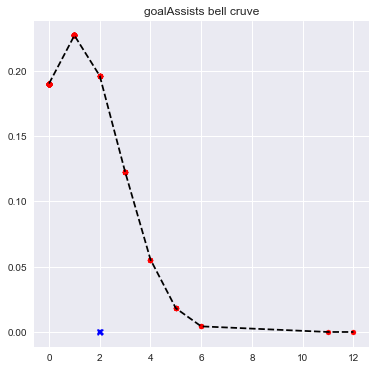

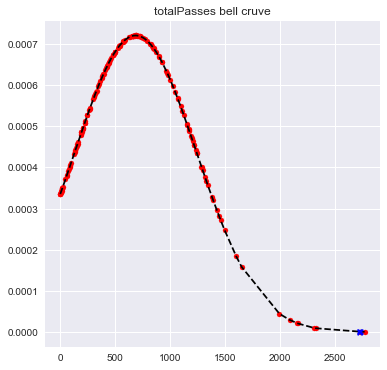

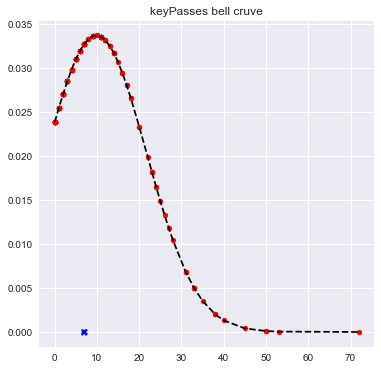

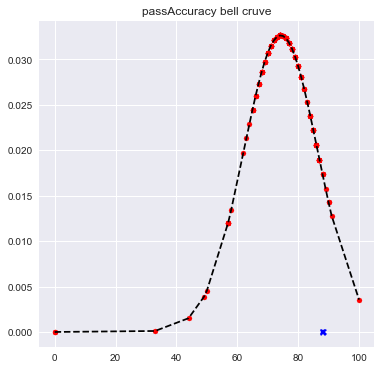

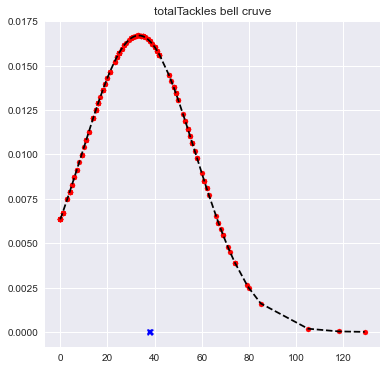

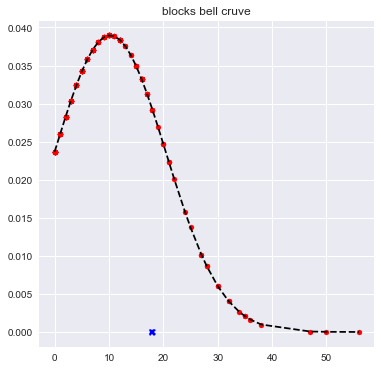

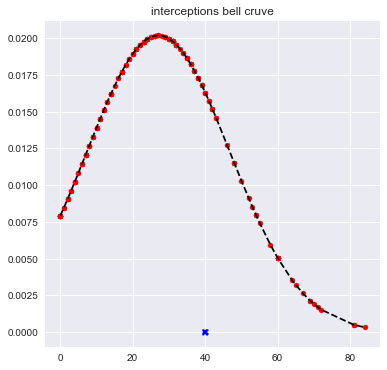

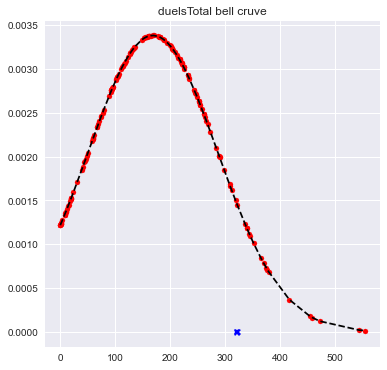

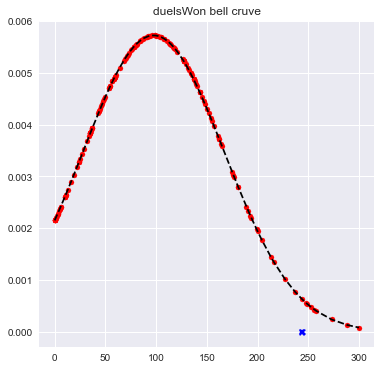

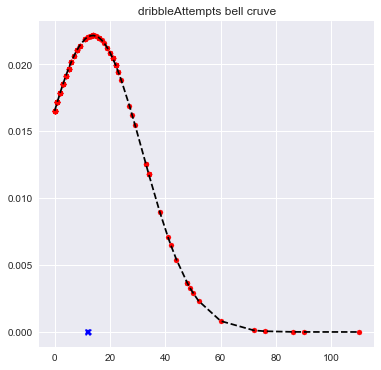

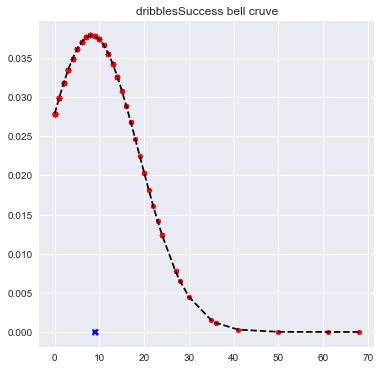

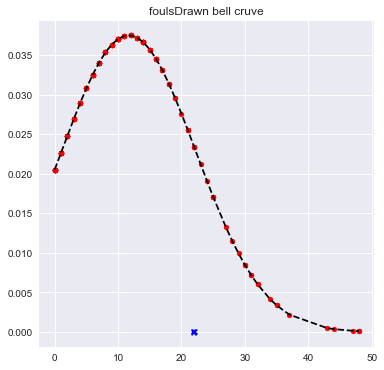

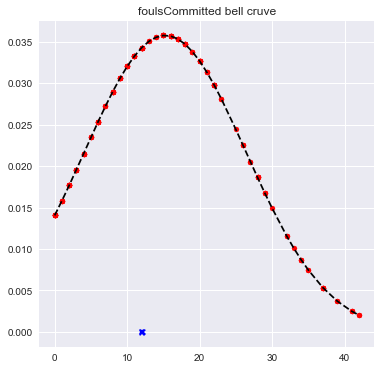

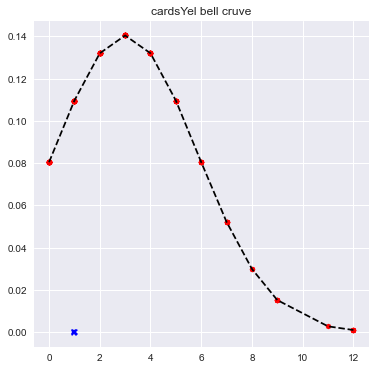

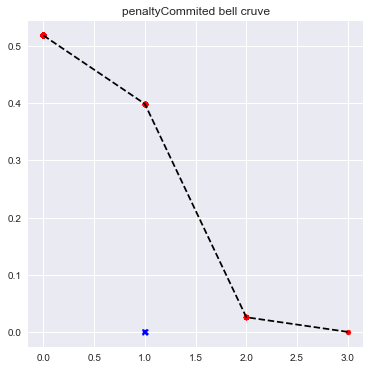

                            Category  Brut Score        Mean  \
VirgilvanDijk 18/19                                            
0                            shotsOn         8.0    2.905882   
1                         totalGoals         4.0    0.758824   
2                      goalsConceded         0.0    0.000000   
3                        goalAssists         2.0    1.047059   
4                          goalSaves         0.0    0.000000   
5                        totalPasses      2724.0  684.917647   
6                          keyPasses         7.0    9.852941   
7                       passAccuracy        88.0   74.270588   
8                       totalTackles        38.0   33.252941   
9                             blocks        18.0   10.211765   
10                     interceptions        40.0   27.064706   
11                        duelsTotal       322.0  168.594118   
12                          duelsWon       244.0   97.500000   
13                   dribbleAttempts    

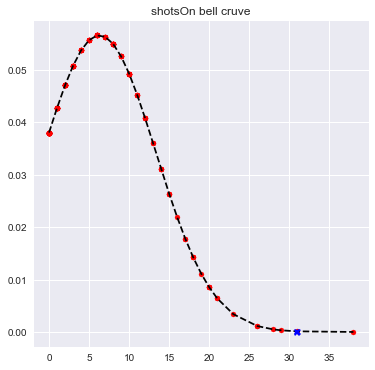

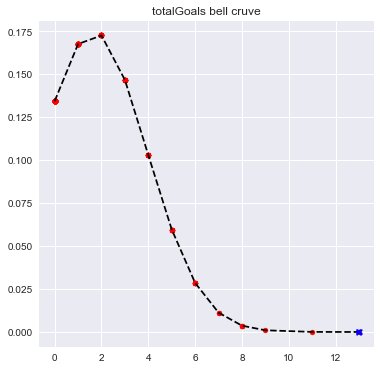

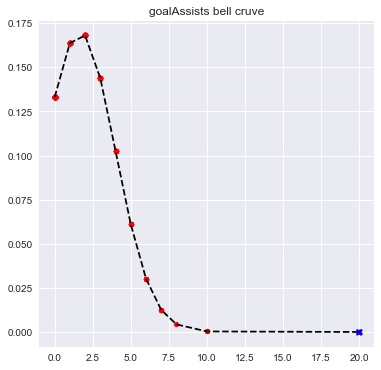

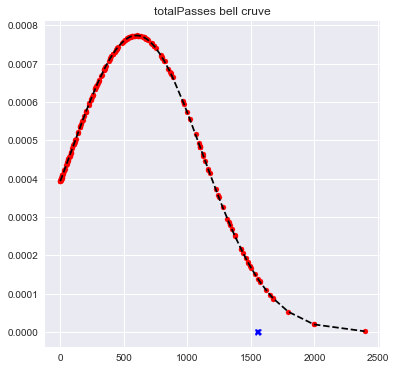

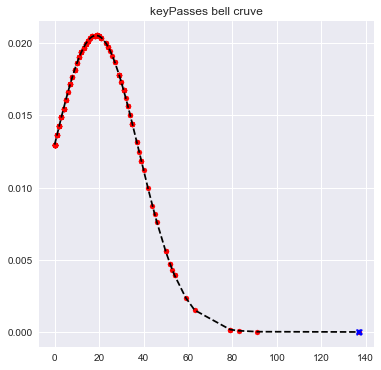

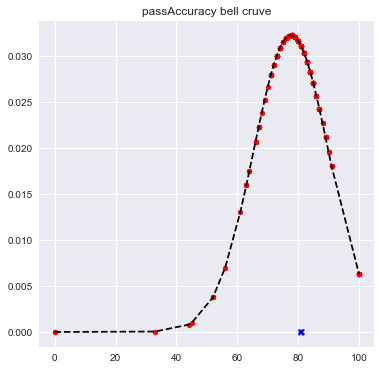

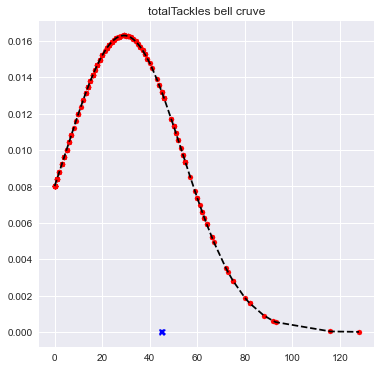

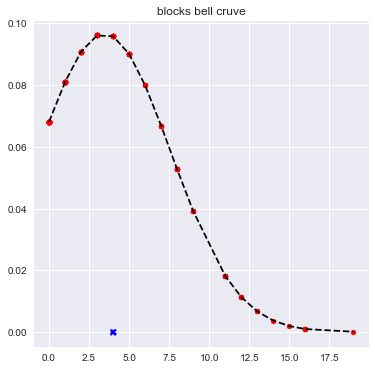

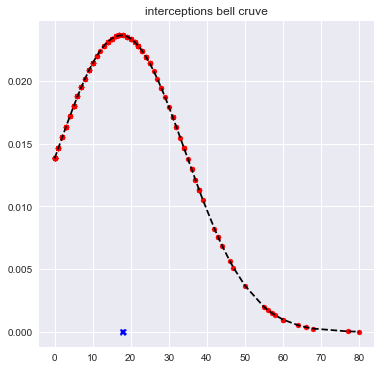

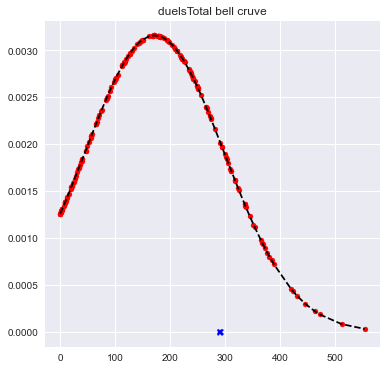

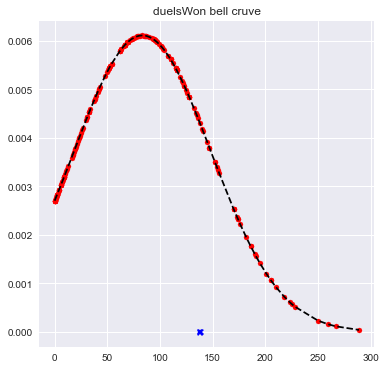

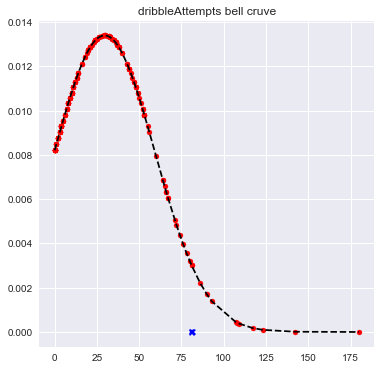

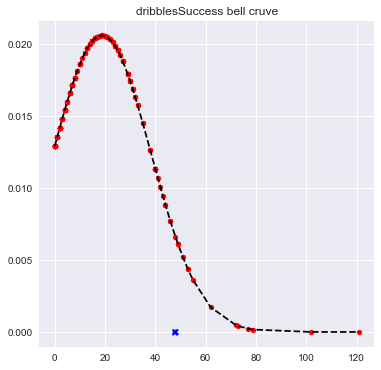

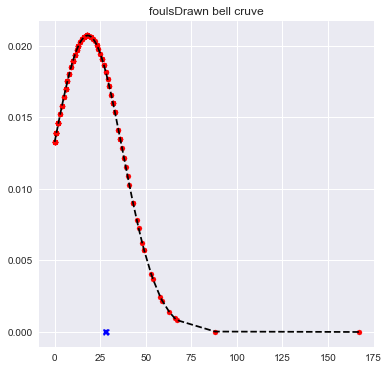

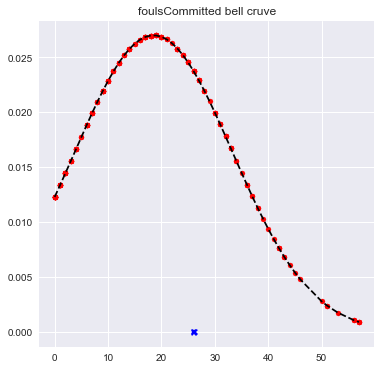

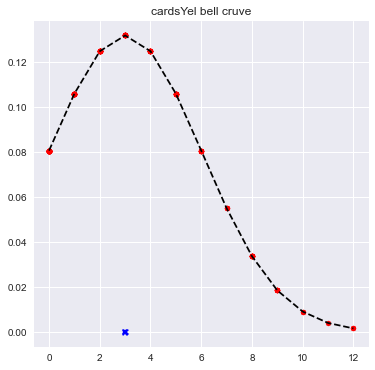

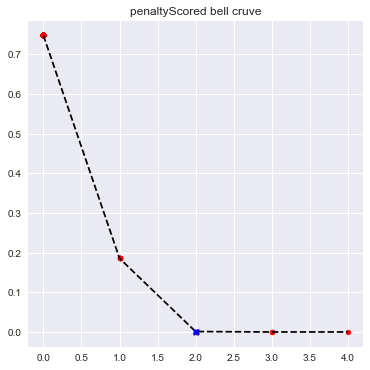

                            Category  Brut Score        Mean  \
KevinDeBruyne 19/20                                            
0                            shotsOn        31.0    6.284211   
1                         totalGoals        13.0    1.652632   
2                      goalsConceded         0.0    0.000000   
3                        goalAssists        20.0    1.642105   
4                          goalSaves         0.0    0.000000   
5                        totalPasses      1554.0  599.405263   
6                          keyPasses       137.0   18.621053   
7                       passAccuracy        81.0   77.642105   
8                       totalTackles        45.0   29.136842   
9                             blocks         4.0    3.452632   
10                     interceptions        18.0   17.473684   
11                        duelsTotal       291.0  171.136842   
12                          duelsWon       138.0   83.300000   
13                   dribbleAttempts    

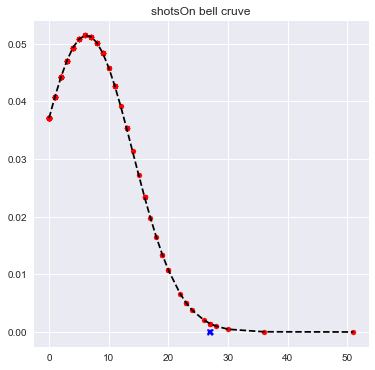

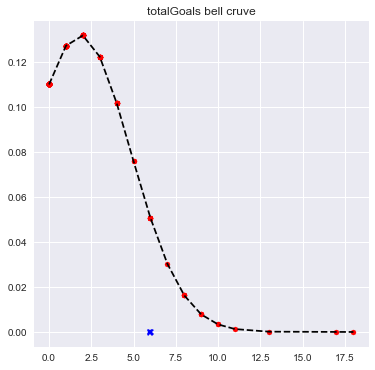

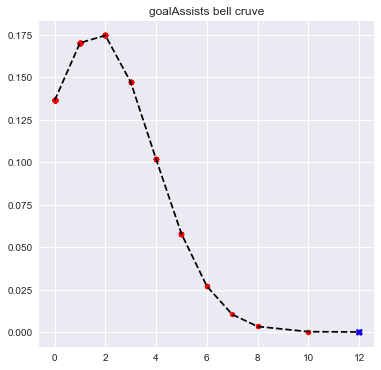

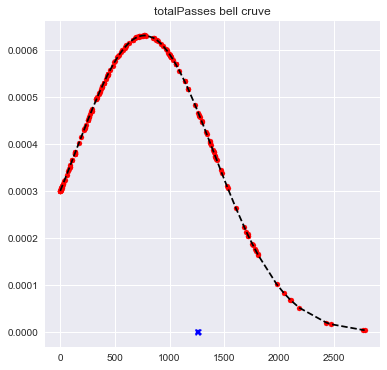

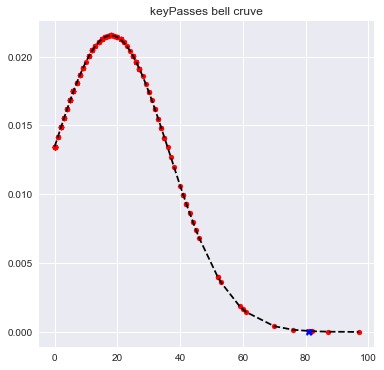

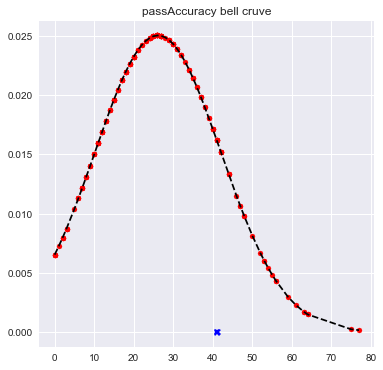

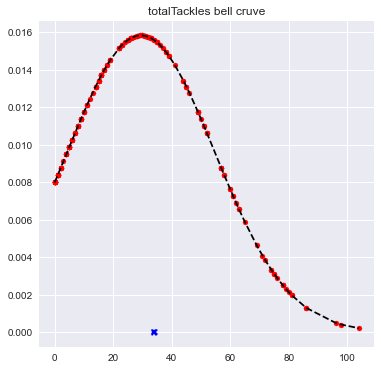

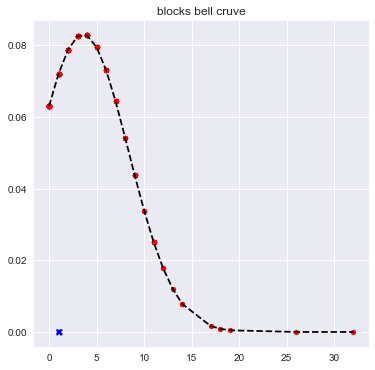

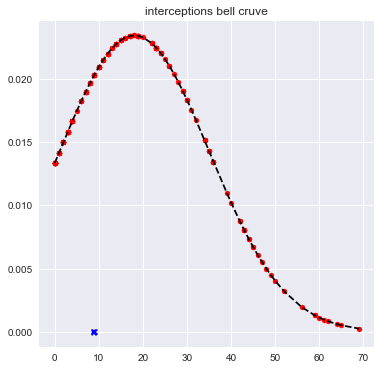

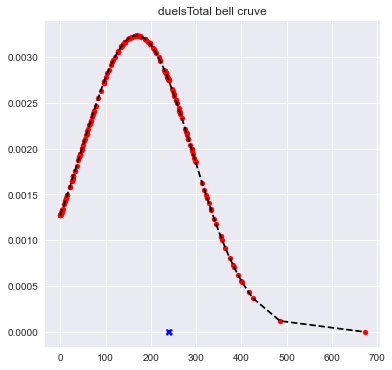

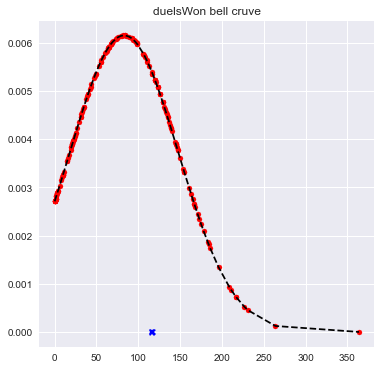

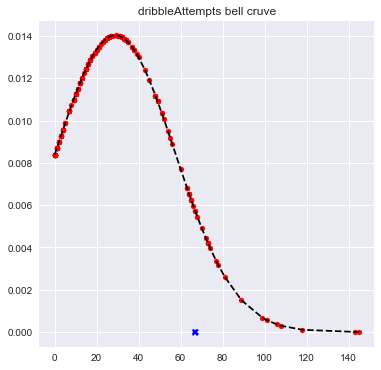

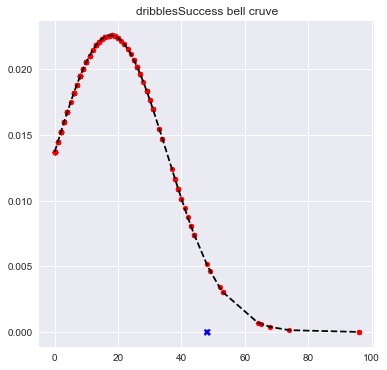

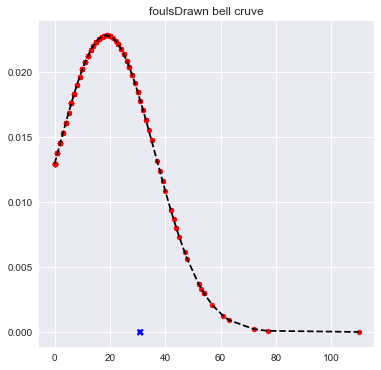

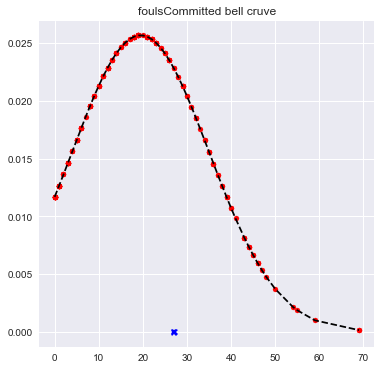

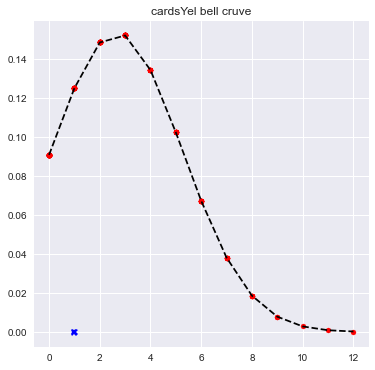

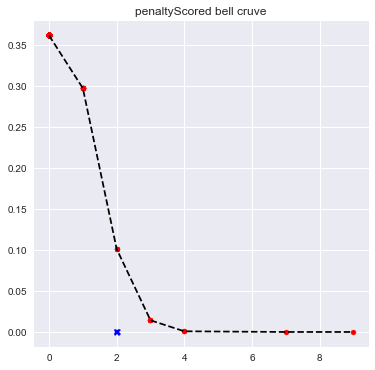

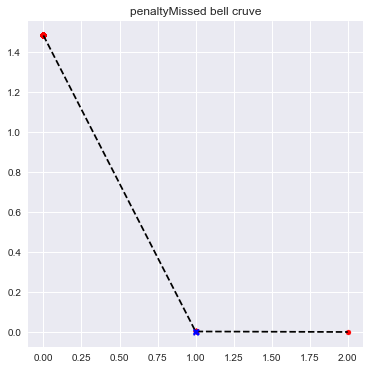

                            Category  Brut Score        Mean  \
KevinDeBruyne 20/21                                            
0                            shotsOn        27.0    6.272222   
1                         totalGoals         6.0    1.822222   
2                      goalsConceded         0.0    0.000000   
3                        goalAssists        12.0    1.627778   
4                          goalSaves         0.0    0.000000   
5                        totalPasses      1263.0  770.894444   
6                          keyPasses        81.0   17.961111   
7                       passAccuracy        41.0   26.122222   
8                       totalTackles        34.0   29.500000   
9                             blocks         1.0    3.566667   
10                     interceptions         9.0   18.072222   
11                        duelsTotal       239.0  168.572222   
12                          duelsWon       117.0   82.977778   
13                   dribbleAttempts    

In [61]:
n = 0
for index, row in PFAdf.iterrows():
    if int(row['season'][:2]) >= 14: 
        print(row['fullname_new'])
        if row['position'] == 'Attacker':
            k = 0
            for col in to_generate:
                if res[n]['Brut Score'].loc[res[n].index[k]] != 0 \
                and res[n]['Mean'].loc[res[n].index[k]] != 0 \
                and res[n]['Standard deviation'].loc[res[n].index[k]] != 0: 
                    #To place data of a given player
                    mark = df.iloc[index][col]

                    # To generate an array of x-values
                    x = dfAttacker[dfAttacker['season']==row['season']][col].sort_values(ascending = True)

                    # To generate an array of
                    # y-values using corresponding x-values
                    y = pdf(x)

                    # Plotting the bell-shaped curve

                    bell_curve(mark, x, y)
                k += 1
            #Showcase stats results
            print(res[n])   
            print('\n\n')
            
        elif row['position'] == 'Midfielder':
            k = 0
            for col in to_generate:
                if res[n]['Brut Score'].loc[res[n].index[k]] != 0 \
                and res[n]['Mean'].loc[res[n].index[k]] != 0 \
                and res[n]['Standard deviation'].loc[res[n].index[k]] != 0: 
                    #To place data of a given player
                    mark = df.iloc[index][col]

                    # To generate an array of x-values
                    x = dfMidfielder[dfMidfielder['season']==row['season']][col].sort_values(ascending = True)

                    # To generate an array of
                    # y-values using corresponding x-values
                    y = pdf(x)

                    # Plotting the bell-shaped curve
                    bell_curve(mark, x, y)
                k += 1
            #Showcase stat results    
            print(res[n])
            print('\n\n')
        elif row['position'] == 'Defender': 
            k = 0
            for col in to_generate:
                if res[n]['Brut Score'].loc[res[n].index[k]] != 0 \
                and res[n]['Mean'].loc[res[n].index[k]] != 0 \
                and res[n]['Standard deviation'].loc[res[n].index[k]] != 0: 
                    #To place data of a given player
                    mark = df.iloc[index][col]

                    # To generate an array of x-values
                    x = dfDefender[dfDefender['season']==row['season']][col].sort_values(ascending = True)

                    # To generate an array of
                    # y-values using corresponding x-values
                    y = pdf(x)

                    # Plotting the bell-shaped curve
                    bell_curve(mark, x, y)
                k += 1
            #Showcase stat results
            print(res[n])
            print('\n\n')
    
        n += 1

In [ ]:
#Now let's see in which attributes the players have a score above 1.5 
#which will be our cut-off for an exceptional result

In [ ]:
res[6][res[6]['Z-score']>1.5]